# plot.py

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## 1. strain

In [13]:
def strain(data, temp, sample_ID):
    plt.rcParams["font.size"]=25
    fig, ax = plt.subplots(1,1,figsize=(40,20))
    data.plot(x="Elapsed Time", ax=ax)
    ax.set_xlabel("Elapsed Time[h]", fontsize="large", fontweight="bold")
    
    ax_t = ax.twinx()
    temp.loc[:,["Elapsed Time", "CH001"]].plot(x="Elapsed Time",ax = ax_t, marker = "o")
    ax_t.set_ylabel("Temperature[$^\circ$C]", fontsize="large",fontweight="bold")
    ax_t.set_ylim([-30,35])
    ax_t.legend()
    
    ax.set_ylabel("Strain[$\mu$strain]", fontsize="large",fontweight="bold")
    ax.legend(bbox_to_anchor=(1.2,1))
    plt.subplots_adjust(left=0.1, right=0.8)
    fig.suptitle(sample_ID, fontsize="large",fontweight="bold")
    
    fig.savefig("./output/" + sample_ID + ".png")
    plt.close(fig)
    return fig

## 2. each_dirc

In [3]:
def each_dirc(data, sample_ID, condition):
    fig = plt.figure(figsize=(35,35))
    ch = condition.loc["xx":"xz", sample_ID].dropna(how="all")
    ech = pd.DataFrame(ch.index)
    ech2 = ech[~ech.duplicated()].reset_index(drop=True)
    
    for i in range(0,len(ech2.index)):
        k = ch.at[ech2.at[i,"#"]]
        axi = fig.add_subplot(3,3,i+1)
        data.plot(x=0,y=k,ax=axi)
        axi.set_xlabel("Elapsed Time[h]", fontsize="large", fontweight="bold")
        axi.set_ylabel("Strain[$\mu$strain]", fontsize="large",fontweight="bold")
        axi.set_title(ech2.at[i,"#"])
    fig.suptitle(sample_ID + "_each_Gage",fontsize="large", fontweight="bold")
    
    fig.savefig("./output/" + sample_ID + "_each.png")
    plt.close(fig)
    return fig

## 3. dummy

In [4]:
def dummy(data, temp, sample_ID):
    plt.rcParams["font.size"]=25
    fig, ax = plt.subplots(1,1,figsize=(40,20))
    data.plot(x="Elapsed Time", ax=ax)
    ax.set_xlabel("Elapsed Time[h]", fontsize="large", fontweight="bold")
    
    ax_t = ax.twinx()
    temp.plot(x="Elapsed Time",ax = ax_t,marker = "o")
    ax_t.set_ylabel("Temperature[$^\circ$C]", fontsize="large",fontweight="bold")
    
    ax.set_ylabel("Strain[$\mu$strain]", fontsize="large",fontweight="bold")
    ax.legend(bbox_to_anchor=(1.2,1))
    plt.subplots_adjust(left=0.1, right=0.8)
    fig.suptitle(sample_ID + " dummy sample", fontsize="large",fontweight="bold")
    
    fig.savefig("./output/" + sample_ID + "_dummy.png")
    plt.close(fig)
    return fig

# テスト部分

In [5]:
from ASR import input
from ASR import manipulation

In [6]:
raw_data_csv = "./InputFiles/normal_strain.csv"
condition_csv= "./InputFiles/input.csv"
dummy_ch_csv = "./InputFiles/dummy_ch.csv"

In [7]:
b,c =  input.csv(condition_csv, dummy_ch_csv)

In [8]:
s = input.strain("FDB-08", raw_data_csv, b)
t = input.temperature("FDB-08", raw_data_csv, b)
du = input.dummy("FDB-08", raw_data_csv, b,c)
da = input.date("FDB-08", raw_data_csv, b)

s = manipulation.offset(s)
du = manipulation.offset(du)

In [9]:
f = pd.concat([da["Elapsed Time"],s], axis=1)
g = pd.concat([da["Elapsed Time"], du], axis=1)
h = pd.concat([da["Elapsed Time"], t], axis=1)

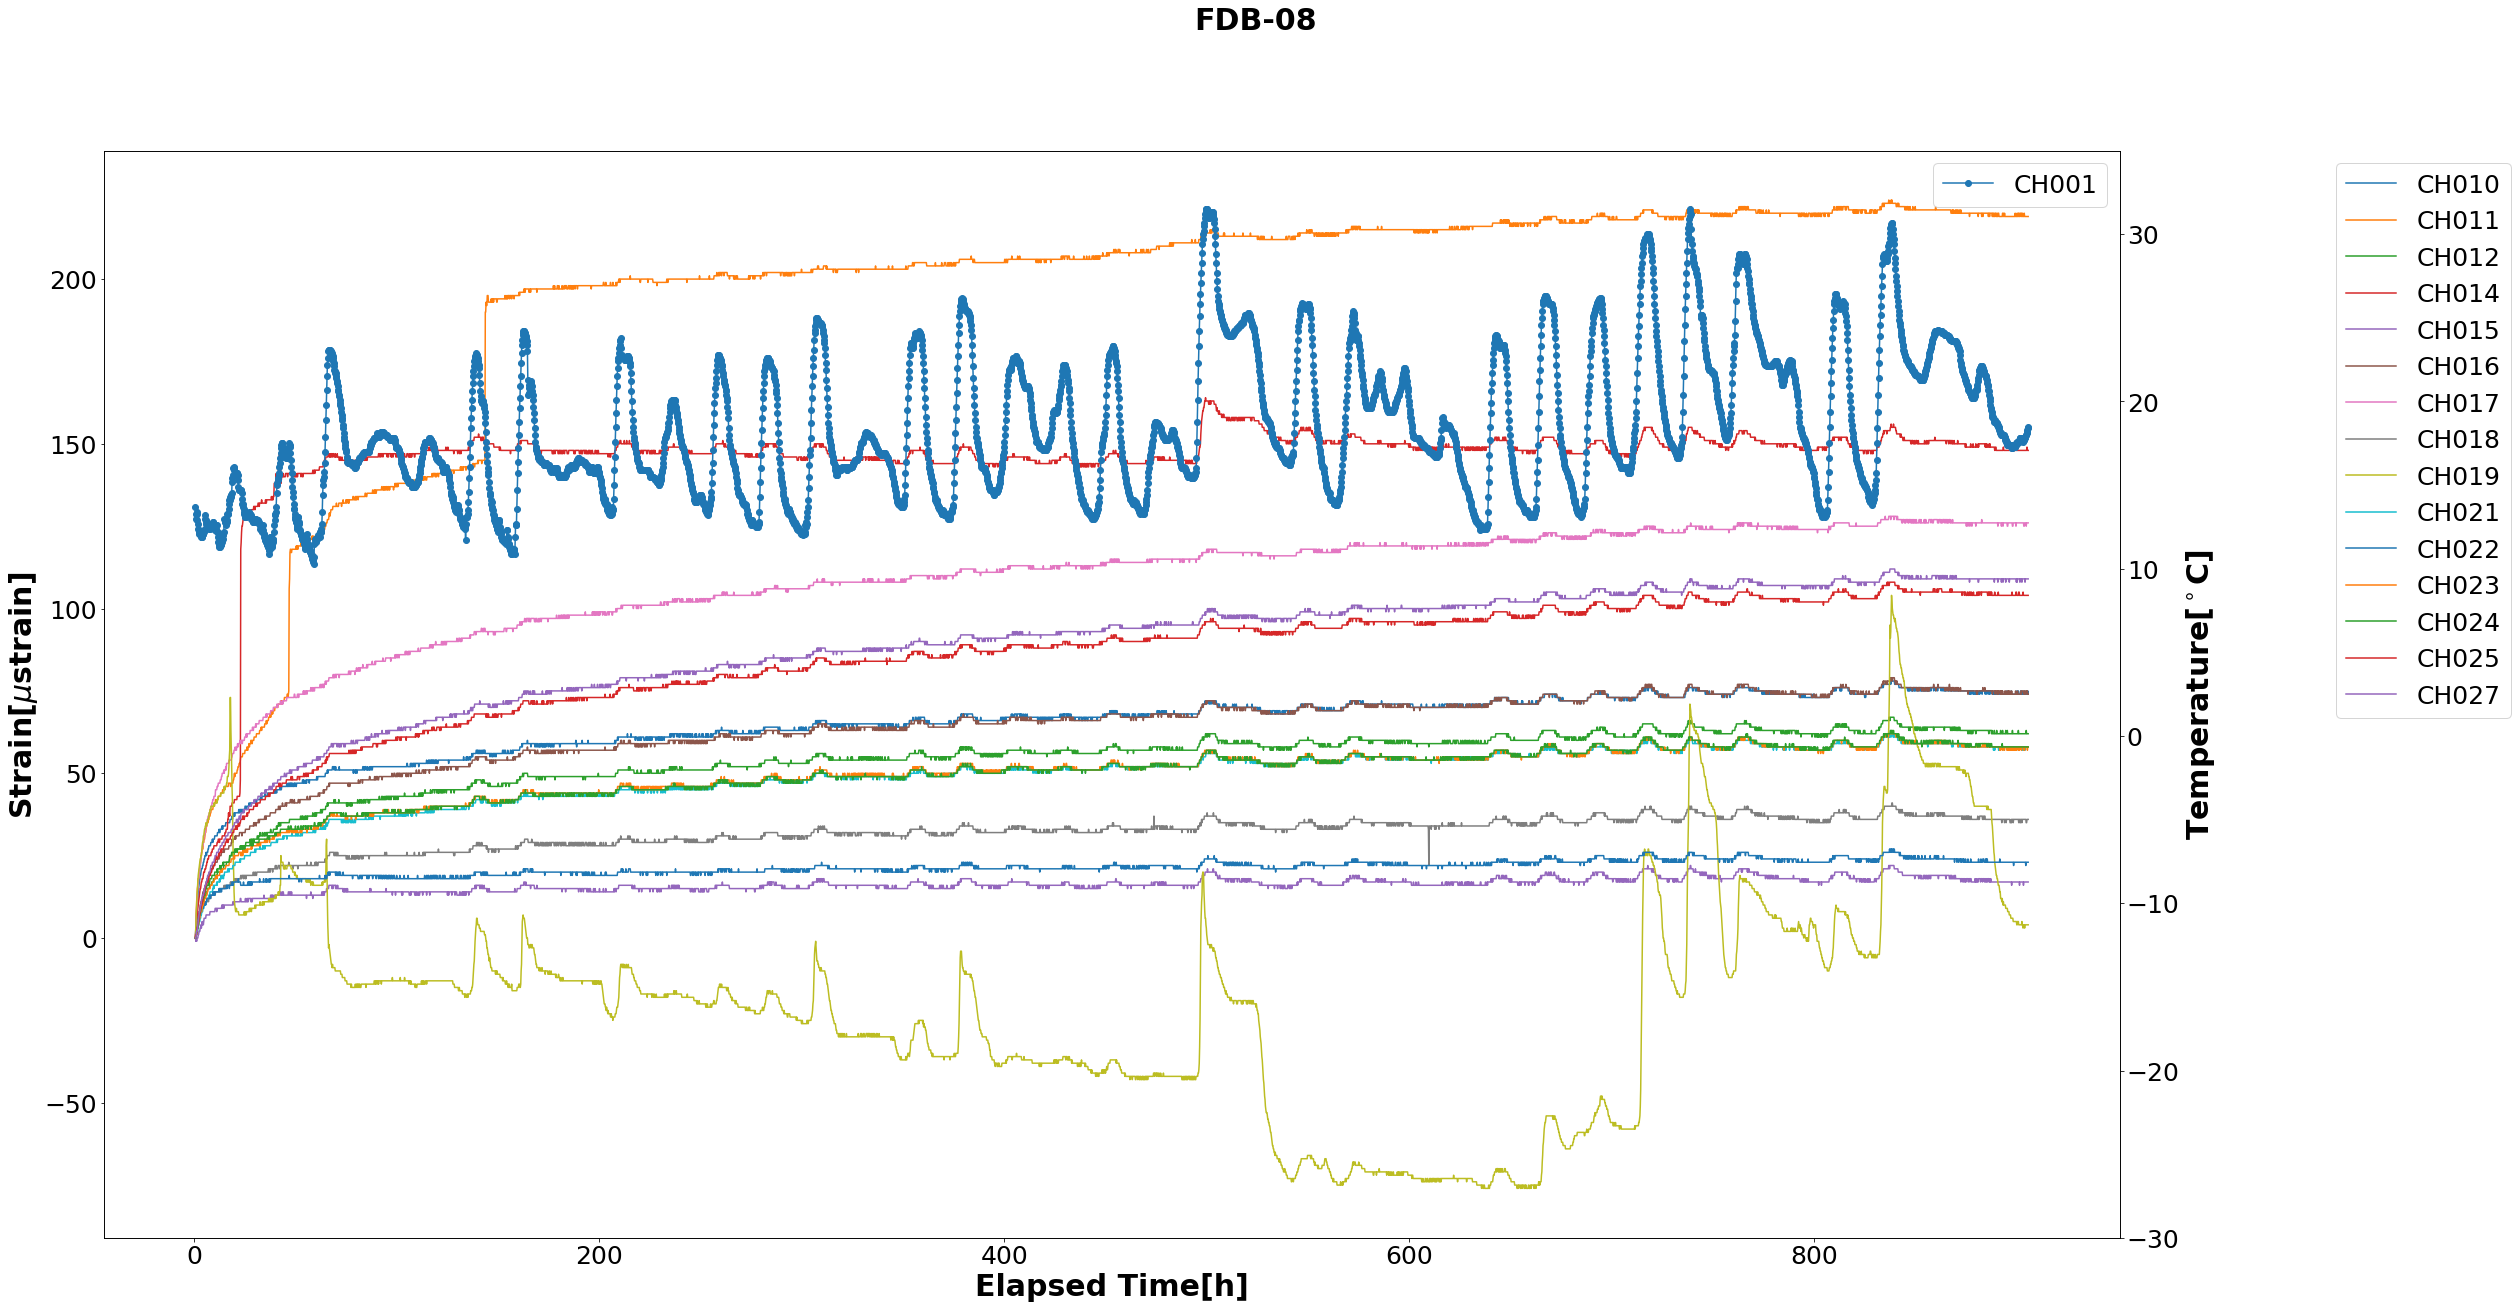

In [14]:
strain(f, h,"FDB-08")

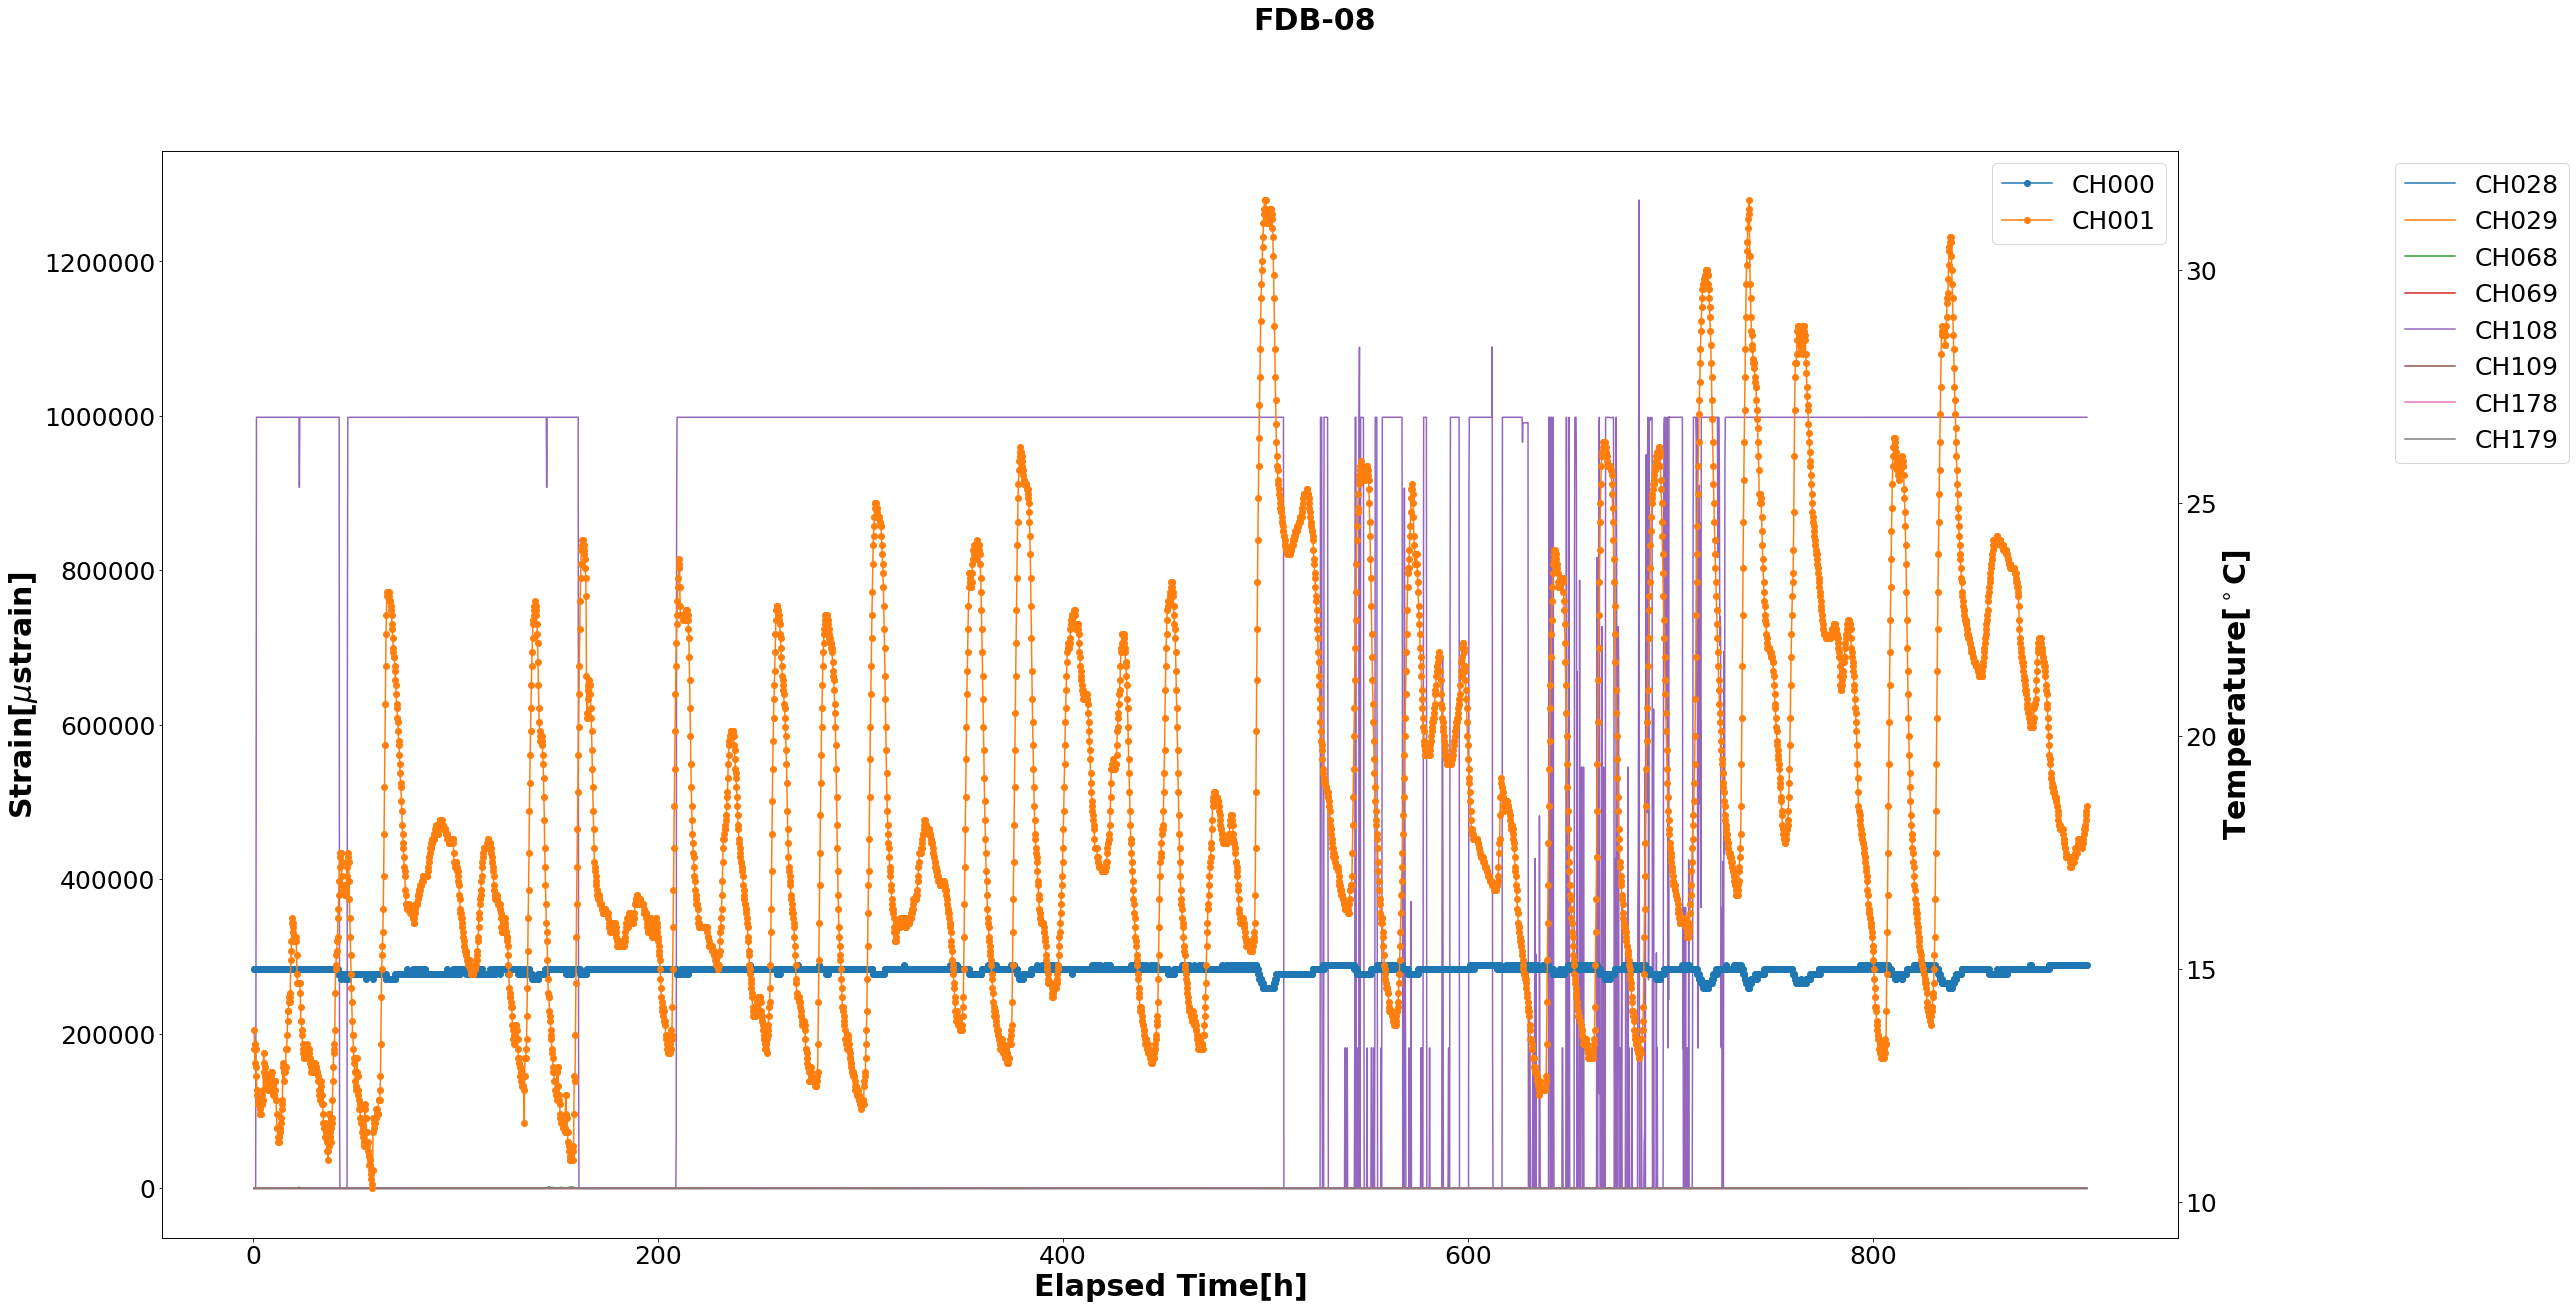

In [54]:
dummy(g,h, "FDB-08")